# <h1><center><span style="color:white">**PROJECT AKHIR**</span></center></h1>
# <h1><center><span style="color:white">**DATA TEXT ANALYSIS WITH PYTHON**</span></center></h1>
# <center><span style='color:white'>Muhammad Hasan Itqoni</span></center>

# IMPORT LIBRARY

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json, tweepy, requests, re, string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory as SF
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import nltk
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup as bs
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud, wordcloud
import networkx as nx

# BUSINESS UNDERSTANDING

## ASSALAMUALAIKUM WR. WB.
### Pada kesempatan kali ini saya akan membuat analisis data berbentuk data text yang diambil dari Twitter dan judul berita dari portal berita Detik.com mengenai salah satu program pemerintah DKI JAKARTA untuk mengatasi bencana banjir yaitu program SUMUR RESAPAN. 
### Analisis yang saya lakukan bertujuan untuk mengetahui sentiment publik terhadap program sumur resapan yang sudah berjalan. Hasil analisis diharap dapat memberikan suatu pandangan/perspektif lain untuk mengevaluasi program sumur resapan yang dijalankan pemerintah DKI JAKARTA.
### Adapun representasi pengambilan sampel pada analisis ini, hanya pada publik yang menggunakan aplikasi Twitter selama seminggu terakhir dan judul berita yang diterbitkan oleh Detik.com pada tanggal 15 Nov 2021 hingga 11 Desember 2021.  


## Depok, 11 Desember 2021

# DATA COLLECTION

#### Data yang diambil adalah data tentang sumur resapan dari tweet pada aplikasi TWitter selama seminggu terakhir sebanyak 1000 tweet dan judul berita dari portal berita Detik.com dari tanggal 15 Nov 2021 hingga 11 Desember 2021 sebanyak 100 judul berita. 

#### MENGAMBIL DATA TWEET DARI TWITTER

In [205]:
class tweetsGrabber:
  def __init__(self):
    with open("token.json")as f:
      tokens = json.load(f)

    self.bearer_token = tokens['bearer_token']
    self.api_key = tokens['api_key']
    self.api_key_secret = tokens['api_key_secret']
    self.access_token = tokens['access_token']
    self.access_token_secret = tokens['access_token_secret']

In [206]:
class api(tweetsGrabber):  
  def auth_handler(self):
    self.api_2 = tweepy.Client(bearer_token=self.bearer_token, wait_on_rate_limit=True)
    return self.api_2

  def search_scraper(self, query, max_result):
    response = tweepy.Paginator(self.auth_handler().search_recent_tweets,
                             query = query,
                             max_results=100,
                             expansions = ["author_id"]
                             ).flatten(limit=max_result)
    
    result = [tweet.text.strip() for tweet in response]
    return result

In [208]:
api_twitter = api()

In [209]:
query = "sumur resapan -is:retweet"
max_result = 1000

tweets = api_twitter.search_scraper(query, max_result)

In [211]:
result_tweets = [tweet for tweet in tweets]

df_tweet = pd.DataFrame(result_tweets, columns=['tweet'])

#### DATA FRAME 1000 TWEET YANG SUDAH DIAMBIL

In [212]:
df_tweet

,tweet
0,Program ‘keberpihakan’ eeh maskudnyah ‘kesetar...
1,"@barryallen_1st Hahahaha,,, cebong protes,,, s..."
2,@aniesbaswedan @HumasSumedang @donyahmadmunir ...
3,@GunRomli @detikcom @aniesbaswedan Rumah lurah...
4,Kontraktor bikin sumur resapan juga kan atas p...
...,...
995,Isyana Bagoes Oka ingin Anies meninjau langsun...
996,Drainase vertikal atau sumur resapan hanya ber...
997,Drainase vertikal atau sumur resapan hanya ber...
998,Drainase vertikal atau sumur resapan hanya ber...


In [213]:
df_tweet.to_csv("tweet_sumur_resapan.csv", index=False)

In [214]:
df_tweet = pd.read_csv('tweet_sumur_resapan.csv')
df_tweet.head()

,tweet
0,Program ‘keberpihakan’ eeh maskudnyah ‘kesetar...
1,"@barryallen_1st Hahahaha,,, cebong protes,,, s..."
2,@aniesbaswedan @HumasSumedang @donyahmadmunir ...
3,@GunRomli @detikcom @aniesbaswedan Rumah lurah...
4,Kontraktor bikin sumur resapan juga kan atas p...


#### MENGAMBIL JUDUL BERITA DARI PORTAL BERITA DETIK.COM

In [215]:
def web_scraping(alamat_url):
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36'
    headers = {'User-Agent': user_agent, 'Accept':'image/avif,image/webp,image/apng,image/svg+xml,image/*,*/*;q=0.8'}

    alamat = alamat_url
    req = Request(alamat, headers=headers)
    html = urlopen(req)

    data = bs(html, 'html.parser')
    berita = data.find_all("h2", {"class":"title"})
    tanggal = data.find_all("span", {"class":"date"})
    judul_berita = [berita.get_text() for berita in berita]
    tanggal_berita = [tanggal.get_text() for tanggal in tanggal]
    df_berita = pd.DataFrame(tanggal_berita, columns=['date'])
    df_berita['title'] = judul_berita
    
    return df_berita

In [220]:
hal_1 = web_scraping('https://www.detik.com/search/searchall?query=sumur%20resapan&siteid=3&sortby=time&page=1')
hal_2 = web_scraping('https://www.detik.com/search/searchall?query=sumur%20resapan&siteid=3&sortby=time&page=2')
hal_3 = web_scraping('https://www.detik.com/search/searchall?query=sumur%20resapan&siteid=3&sortby=time&page=3')
hal_4 = web_scraping('https://www.detik.com/search/searchall?query=sumur%20resapan&siteid=3&sortby=time&page=4')
hal_5 = web_scraping('https://www.detik.com/search/searchall?query=sumur%20resapan&siteid=3&sortby=time&page=5')
hal_6 = web_scraping('https://www.detik.com/search/searchall?query=sumur%20resapan&siteid=3&sortby=time&page=6')
hal_7 = web_scraping('https://www.detik.com/search/searchall?query=sumur%20resapan&siteid=3&sortby=time&page=7')
hal_8 = web_scraping('https://www.detik.com/search/searchall?query=sumur%20resapan&siteid=3&sortby=time&page=8')
hal_9 = web_scraping('https://www.detik.com/search/searchall?query=sumur%20resapan&siteid=3&sortby=time&page=9')
hal_10 = web_scraping('https://www.detik.com/search/searchall?query=sumur%20resapan&siteid=3&sortby=time&page=10')
hal_11 = web_scraping('https://www.detik.com/search/searchall?query=sumur%20resapan&siteid=3&sortby=time&page=11')

In [221]:
df_news = pd.concat([hal_1,hal_2,hal_3, hal_4,hal_5,hal_6,hal_7,hal_8, hal_9,hal_10, hal_11],axis=0,sort=False).reset_index()
df_news.drop(columns=['index'], axis=1, inplace=True)
df_news['date'] = df_news['date'].str.replace(r'detikNews', '')

#### DATA FRAME JUDUL BERITA YANG SUDAH DIAMBIL

In [222]:
df_news.to_csv("news_sumur_resapan.csv", index=False)
df_news

,date,title
0,"Sabtu, 11 Des 2021 07:49 WIB",PDIP DKI: Sumur Resapan Bukan Menanggulangi Ba...
1,"Sabtu, 11 Des 2021 06:02 WIB",Polemik Isyana di Sumur Resapan dan Tuduhan 'M...
2,"Jumat, 10 Des 2021 18:03 WIB",Isyana Minta Anies Tinjau Sumur Resapan Tempat...
3,"Jumat, 10 Des 2021 17:35 WIB","Lurah Sebut Warga Copot Plang Sumur Resapan, W..."
4,"Jumat, 10 Des 2021 16:53 WIB",Pedagang: Jalan Tempat Mobil Isyana Terjeblos ...
...,...,...
94,"Rabu, 17 Nov 2021 14:40 WIB",Wagub DKI Nilai Sumur Resapan Efektif: Manfaat...
95,"Selasa, 16 Nov 2021 23:18 WIB","PDIP Minta Anggaran Sumur Resapan Dicoret, Wag..."
96,"Selasa, 16 Nov 2021 18:45 WIB",F-PDIP Usul Anggaran Sumur Resapan 2022 Dicore...
97,"Selasa, 16 Nov 2021 16:22 WIB","Pembangunan Sumur Resapan Disorot, Wagub DKI B..."


In [223]:
df_news = pd.read_csv('news_sumur_resapan.csv')
df_news.head()

,date,title
0,"Sabtu, 11 Des 2021 07:49 WIB",PDIP DKI: Sumur Resapan Bukan Menanggulangi Ba...
1,"Sabtu, 11 Des 2021 06:02 WIB",Polemik Isyana di Sumur Resapan dan Tuduhan 'M...
2,"Jumat, 10 Des 2021 18:03 WIB",Isyana Minta Anies Tinjau Sumur Resapan Tempat...
3,"Jumat, 10 Des 2021 17:35 WIB","Lurah Sebut Warga Copot Plang Sumur Resapan, W..."
4,"Jumat, 10 Des 2021 16:53 WIB",Pedagang: Jalan Tempat Mobil Isyana Terjeblos ...


# DATA PREPARATION

#### Pada tahap ini, kedua data frame yaitu data tweet dan data news (judul berita) dilakukan pembersihan data sebelum dilakukan analisis.
#### Data preparation yang dilakukan terdiri dari :
##### - Pembersihan dimana data hanya menyisakan kata-kata dengan alfabet kecil, artinya semua angka, tanda baca, huruf besar, alamat situs, dsb diganti / dihilangkan. Contoh : Aku& dia menyukai__ apel!! /n --> aku dia menyukai apel
##### - Pembersihan dengan menghilangkan kata-kata yang tidak terpakai atau banyak digunakan dari kalimat (stopword). Kata tersebut bisa kata sambung atau kata ganti orang. Contoh : Aku menyukai apel --> menyukai apel 
##### - Pembersihan dimana mengembalikan semua kata ke dalam bentuk dasarnya. Contoh : menyukai apel --> suka apel
##### - Pembersihan dengan mengubah kata-kata slang/gaul. Contoh : gue dan loe sk apel --> aku dan kamu suka apel


In [224]:
def case_folding(data):
    data = data.lower()
    data = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(\d+)"," ",data).split())
    data = data.translate(str.maketrans("","",string.punctuation))
    data = re.sub(r"\n","",data)
    data = re.sub(r"\t","",data)
    
    return data


In [225]:
def stopword_cleaner(data):
    sw_indonesia = stopwords.words("indonesian")
    sw_english = stopwords.words("english")
    data  = [word for word in data if word not in sw_indonesia]
    data  = [word for word in data if word not in sw_english]
    data = ' '.join(data)
    return data

In [226]:
def stemmer_engine(data):
    factory = SF()
    stemmer = factory.create_stemmer()
    data = stemmer.stem(data)
    return data


In [238]:
def slang_cleaner(data):
    slang_list = [
        ('yg','yang'),
        ('ya','iya'),
        ('gak','tidak'),
        ('ga','tidak'),
        ('aja','saja'),
        ('kalo','kalau'),
        ('gajinya','gaji'),
        ('jg','juga'),
        ('jd','jadi'),
        ('klo','kalau'),
        ('dgn','dengan'),
        ('tdk','tidak'),
        ('dki','jakarta'),
        ('id','indonesia'),
        ('lo','anda'),
        ('kadrunhamankri', 'kadrun hama nkri'),
        ('nkrimajuberjaya','nkri maju berjaya'),
        ('sumurresapan','sumur resapan'),
        ('dr','dari'),
        ('tolol','bodoh'),
        ('tp','tapi'),
        ('sdh','sudah'),
        ('lu','anda'),
        ('km','anda'),
        ('jiwarevolusiakhlak','jiwa revolusi akhlak'),
        ('tuh','itu'),
        ('aniesbaswedan','anies baswedan'),
        ('sumurresapananggaran', 'anggaran sumur resapan'),
        ('rk', 'ridwan kamil'),
        ('tau','tahu'),
        ('mana','dimana'),
        ('moga','semoga'),
        ('emang', 'memang'),
        ('nih','ini'),
        ('n','dan'),
        ('gw','saya'),
        ('lobang','lubang'),
        ('krn', 'karena'),
        ('kau','anda'),
        ('msh','masih'),
        ('ri','republik indonesia'),
        ('pa','bapak'),
        ('dah','sudah'),
        ('gub','gubernur'),
        ('bacot','mulut'),
        ('ngga','tidak'),
        ('udah','sudah'),
        ('banjiiiirrrrrr','banjir'),
        ('utk','untuk'),
        ('lurahlebakbuluspembohong','lurah lebak bulus pembohong'),
        ('bener','benar'),
        ('bagoes','bagus'),
        ('jkt','jakarta'),
        ('trus', 'terus'),
        ('loe', 'anda'),
        ('pake', 'pakai'),
        ('kali', 'sungai'),
        ('ekokuntadhi', 'eko kuntadhi'),
        ('rp','rupiah'),
        ('sda', 'sumber daya alam'),
        ('detikcom do your magic',''),
        ('thn','tahun'),
        ('iya',''),
        ('biar',''),
        ('rusa','rusak'),
        ('jl','jalan'),
        ('aniesgagaltotal','anies gagal total'),
        ('rapi','rapih')
        
    ]
    
    word_token = word_tokenize(data)
    word_list = []
    
    for word in word_token:
        for slang in slang_list:
            if word.lower() in slang[0].lower():
                word = slang[1]
                break
        word_list.append(word)
    
    data = ' '.join(word_list)
    return data    

In [239]:
def proses(data):
    data = case_folding(data)
    data = word_tokenize(data)
    data = stopword_cleaner(data)
    data = stemmer_engine(data)
    return data

In [229]:
df_tweet['clean'] = 'NaN'
df_news['clean'] = 'NaN'

In [240]:
for index in range(len(df_tweet)):
    df_tweet.iloc[index,1] = proses(df_tweet.iloc[index,0])
    df_tweet.iloc[index,1] = slang_cleaner(df_tweet.iloc[index,1])
    df_tweet.iloc[index,1] = proses(df_tweet.iloc[index,1])

for index in range(len(df_news)):
    df_news.iloc[index,2] = proses(df_news.iloc[index,1])
    df_news.iloc[index,2] = slang_cleaner(df_news.iloc[index,2])
    df_news.iloc[index,2] = proses(df_news.iloc[index,2])


In [241]:
display(df_tweet)
display(df_news)

,tweet,clean
0,Program ‘keberpihakan’ eeh maskudnyah ‘kesetar...,program eeh maskudnyah tara jgn kmu kjeblos ng...
1,"@barryallen_1st Hahahaha,,, cebong protes,,, s...",st hahahaha cebong protes tutup sumur resap su...
2,@aniesbaswedan @HumasSumedang @donyahmadmunir ...,nich kumpul buzzer kumpul gaji urusin sumur re...
3,@GunRomli @detikcom @aniesbaswedan Rumah lurah...,rumah lurah lebak bulus bohong tinggal situ iy...
4,Kontraktor bikin sumur resapan juga kan atas p...,kontraktor bikin sumur resap sumur resap perin...
...,...,...
995,Isyana Bagoes Oka ingin Anies meninjau langsun...,isyana bagus oka anies baswedan tinjau langsun...
996,Drainase vertikal atau sumur resapan hanya ber...,drainase vertikal sumur resap sumur resap fung...
997,Drainase vertikal atau sumur resapan hanya ber...,drainase vertikal sumur resap sumur resap fung...
998,Drainase vertikal atau sumur resapan hanya ber...,drainase vertikal sumur resap sumur resap fung...


,date,title,clean
0,"Sabtu, 11 Des 2021 07:49 WIB",PDIP DKI: Sumur Resapan Bukan Menanggulangi Ba...,pdip jakarta sumur resap sumur resap tanggulan...
1,"Sabtu, 11 Des 2021 06:02 WIB",Polemik Isyana di Sumur Resapan dan Tuduhan 'M...,polemik isyana sumur resap sumur resap tuduh m...
2,"Jumat, 10 Des 2021 18:03 WIB",Isyana Minta Anies Tinjau Sumur Resapan Tempat...,isyana anies baswedan tinjau sumur resap sumur...
3,"Jumat, 10 Des 2021 17:35 WIB","Lurah Sebut Warga Copot Plang Sumur Resapan, W...",lurah lebak bulus bohong warga copot plang sum...
4,"Jumat, 10 Des 2021 16:53 WIB",Pedagang: Jalan Tempat Mobil Isyana Terjeblos ...,dagang jalan mobil isyana jeblos sumur resap s...
...,...,...,...
94,"Rabu, 17 Nov 2021 14:40 WIB",Wagub DKI Nilai Sumur Resapan Efektif: Manfaat...,wagub jakarta nilai sumur resap sumur resap ef...
95,"Selasa, 16 Nov 2021 23:18 WIB","PDIP Minta Anggaran Sumur Resapan Dicoret, Wag...",pdip anggar sumur resap sumur resap sumur resa...
96,"Selasa, 16 Nov 2021 18:45 WIB",F-PDIP Usul Anggaran Sumur Resapan 2022 Dicore...,f pdip usul anggar sumur resap sumur resap sum...
97,"Selasa, 16 Nov 2021 16:22 WIB","Pembangunan Sumur Resapan Disorot, Wagub DKI B...",bangun sumur resap sumur resap sorot wagub jak...


# DATA PROCESSING

#### Data processing yang akan dilakukan terdiri dari 4 analisis yaitu:
##### - Ekplorasi data dengan Text Data Analysis
##### - Sentiment Analysis
##### - Sentiment Analysis with Machine Learning
##### - Network Analysis

## TEXT DATA ANALYSIS

#### Pada tahap ini, kedua data frame dilakukan ekplorasi data yang sudah dibersihkan sebelumnya.
#### Ekplorasi data yang dilakukan melihat beberapa hal yang terdiri dari :
##### - Distribusi Frekuensi jumlah huruf. 
##### - Distribusi Frekuensi jumlah kata.
##### - Distribusi Frekuensi panjang kata rata-rata.
##### - Distribusi Frekuensi kata yang sering keluar.
##### - Distribusi N-gram.

In [251]:
df_tweet.name= 'tweet'
df_news.name = 'news'

In [254]:
def char_freq_distribution(data):
    bin = np.arange(0,260,10)
    data["clean"].str.len().hist(bins=bin)
    if data.name == 'tweet':
        judul = 'Tweet'
    else :
        judul = 'News'
    plt.xlabel('Jumlah Huruf per Kata')
    plt.title(f'Distribusi Frekuensi Huruf Data {judul}')
    plt.show()

In [256]:
def word_len_freq_distribution(data):
    bin_range = np.arange(0, 50)
    data['clean'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
    if data.name == 'tweet':
        judul = 'Tweet'
    else :
        judul = 'News'
    plt.xlabel(f'Jumlah Kata per {judul} ')
    plt.title(f'Distribusi Frekuensi Kata Data {judul}')
    plt.show()
    

In [258]:
def mean_words_freq_distribution(data):
    data['clean'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
    if data.name == 'tweet':
        judul = 'Tweet'
    else :
        judul = 'News'
    plt.xlabel(f'Panjang Kata Rata-Rata per {judul} ')
    plt.title(f'Distribusi Frekuensi Panjang Kata Rata-Rata Data {judul}')
    plt.show()   

In [268]:
def words_freq_distribution(data):
    data['clean'] = data['clean'].apply(lambda x: word_tokenize(str(x)))
    tweets = [word for tweet in data["clean"] for word in tweet]
    fqdist = FreqDist(tweets)
    most_common_word = fqdist.most_common(50)
    print(most_common_word)
    if data.name == 'tweet':
        judul = 'Tweet'
    else :
        judul = 'News'
    plt.xlabel(f'Frekuensi Kata {judul} ')
    plt.title(f'Distribusi Frekuensi Kata Data {judul}')
    fqdist.plot(20,cumulative=False)
    return most_common_word, tweets

In [271]:
def bigram_analysis (data):
    tweets = [word for tweet in data['clean'] for word in tweet]
    result = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:20]
    print(result)

##### - Distribusi Frekuensi Jumlah Huruf
##### Pada grafik distribusi frekuensi jumlah huruf pada masing-masing dataframe dapat dilihat bahwa jumlah huruf per kata pada tweet terbanyak yaitu 110 huruf, dan pada data News/judul berita terbanyak sekitar 60 - 70 huruf per kata. 

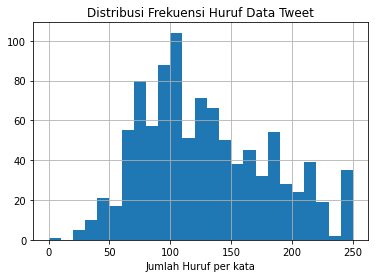

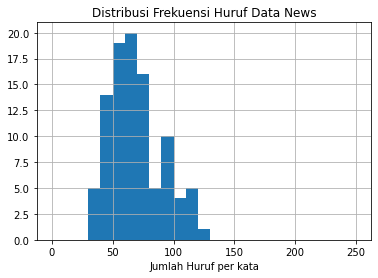

In [255]:
char_freq_distribution(df_tweet)
char_freq_distribution(df_news)

##### - Distribusi Frekuensi Jumlah Kata
##### Pada grafik distribusi frekuensi jumlah kata pada masing-masing dataframe dapat dilihat bahwa jumlah kata pada tweet terbanyak di sekitar 15 - 18 kata, dan pada data News/judul berita terbanyak di sekitar 10 - 11 kata. 

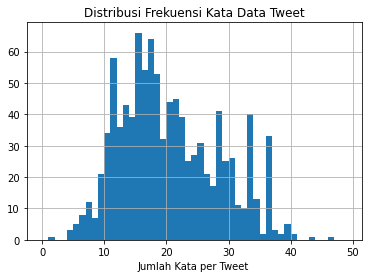

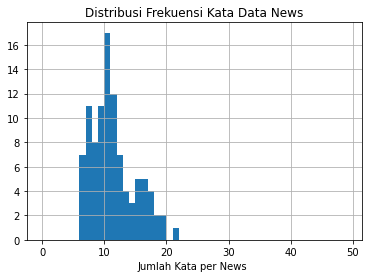

In [257]:
word_len_freq_distribution(df_tweet)
word_len_freq_distribution(df_news)

##### - Distribusi Frekuensi Panjang Rata-Rata Kata
##### Pada grafik distribusi frekuensi panjang rata-rata kata pada masing-masing dataframe dapat dilihat bahwa rata-rata kata pada tweet antara 5 - 6 kata pertweet, dan pada data News/judul berita antara 5 - 5.5 kata per judul. 

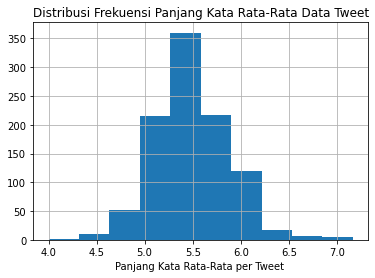

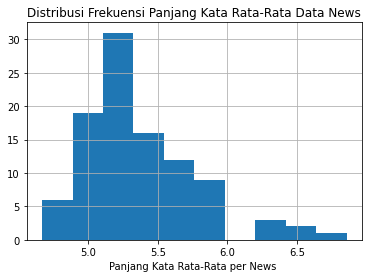

In [259]:
mean_words_freq_distribution(df_tweet)
mean_words_freq_distribution(df_news)

##### - Distribusi Frekuensi Kata yang Sering Keluar
##### Pada grafik distribusi frekuensi 50 kata yang paling sering keluar pada masing-masing dataframe dapat dilihat bahwa kata yang paling sering keluar pada data tweet adalah sumur, resap, anies, gagal, total, baswedan, jakarta, jalan, dst dan pada data News/judul adalah sumur, resap, lurah, lebak, bulus,bohong, jakarta, mobil, dst. 

[('sumur', 2222), ('resap', 2222), ('anies', 1747), ('gagal', 969), ('total', 969), ('baswedan', 778), ('jakarta', 690), ('jalan', 232), ('proyek', 186), ('gubernur', 173), ('isyana', 162), ('bangun', 145), ('banjir', 136), ('kota', 123), ('mobil', 112), ('psi', 112), ('anggar', 110), ('warga', 95), ('program', 92), ('rusak', 92), ('rumah', 91), ('pemprov', 91), ('selamat', 90), ('tinjau', 90), ('bagus', 87), ('oka', 79), ('jeblos', 74), ('efektif', 73), ('lurah', 72), ('lebak', 72), ('bulus', 72), ('bohong', 72), ('guntur', 72), ('kritik', 71), ('kejar', 67), ('skala', 64), ('ketua', 62), ('dpp', 61), ('nilai', 60), ('air', 59), ('carut', 59), ('marut', 59), ('tata', 58), ('lokasi', 57), ('kendara', 55), ('korban', 54), ('ancam', 53), ('gaji', 52), ('sibuk', 52), ('kerja', 52)]


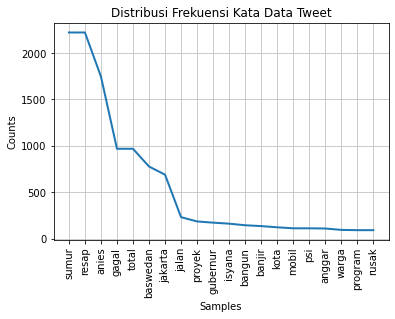

[('sumur', 182), ('resap', 182), ('lurah', 42), ('lebak', 42), ('bulus', 42), ('bohong', 42), ('jakarta', 31), ('mobil', 20), ('jalan', 14), ('isyana', 11), ('jebol', 11), ('aspal', 11), ('wagub', 10), ('banjir', 8), ('anies', 8), ('baswedan', 8), ('rusak', 8), ('proyek', 8), ('bikin', 8), ('kontraktor', 8), ('soleh', 8), ('solihun', 8), ('pdip', 7), ('jeblos', 7), ('warga', 7), ('bangun', 7), ('drainase', 7), ('pemprov', 6), ('jaksel', 6), ('tanah', 6), ('sorot', 6), ('anggar', 6), ('vertikal', 6), ('bolak', 5), ('sumber', 5), ('daya', 5), ('alam', 5), ('tutup', 5), ('rupiah', 5), ('perosok', 5), ('dprd', 5), ('lubang', 5), ('pasar', 5), ('minggu', 5), ('juta', 4), ('nilai', 4), ('kritik', 4), ('pot', 4), ('tuduh', 3), ('indah', 3)]


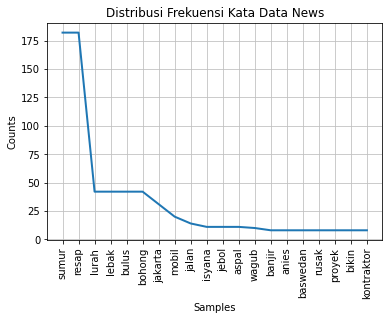

([('sumur', 182),
  ('resap', 182),
  ('lurah', 42),
  ('lebak', 42),
  ('bulus', 42),
  ('bohong', 42),
  ('jakarta', 31),
  ('mobil', 20),
  ('jalan', 14),
  ('isyana', 11),
  ('jebol', 11),
  ('aspal', 11),
  ('wagub', 10),
  ('banjir', 8),
  ('anies', 8),
  ('baswedan', 8),
  ('rusak', 8),
  ('proyek', 8),
  ('bikin', 8),
  ('kontraktor', 8),
  ('soleh', 8),
  ('solihun', 8),
  ('pdip', 7),
  ('jeblos', 7),
  ('warga', 7),
  ('bangun', 7),
  ('drainase', 7),
  ('pemprov', 6),
  ('jaksel', 6),
  ('tanah', 6),
  ('sorot', 6),
  ('anggar', 6),
  ('vertikal', 6),
  ('bolak', 5),
  ('sumber', 5),
  ('daya', 5),
  ('alam', 5),
  ('tutup', 5),
  ('rupiah', 5),
  ('perosok', 5),
  ('dprd', 5),
  ('lubang', 5),
  ('pasar', 5),
  ('minggu', 5),
  ('juta', 4),
  ('nilai', 4),
  ('kritik', 4),
  ('pot', 4),
  ('tuduh', 3),
  ('indah', 3)],
 ['pdip',
  'jakarta',
  'sumur',
  'resap',
  'sumur',
  'resap',
  'tanggulang',
  'banjir',
  'polemik',
  'isyana',
  'sumur',
  'resap',
  'sumur',
  '

In [270]:
words_freq_distribution(df_tweet)
words_freq_distribution(df_news)


##### - Distribusi N-gram.
##### Pada output analisis bigram di bawah, dapat dilihat bahwa pada data tweet kata berpasangan yang paling sering keluar adalah sumur-resap, gagal-total, anies-gagal, anies-baswedan, gubernur-jakarta, total-sumur, anggar-sumur, dst. Lalu, pada data news kata berpasangan yang paling sering keluar adalah sumur-resap, bulus-bohong, lebak-bulus, lurah-lebak, dst.
##### Pada output ini dapat dilihat gambaran awalnya data bahwa pada data tweet lebih membahas pada kegagalan anies dalam menjalankan program sumur resapan, dan pada data news lebih membahas pada lurah lebak bulus yang berbohong, dan sebagainya.

In [272]:
bigram_analysis(df_tweet)
bigram_analysis(df_news)

(sumur, resap)         2222
(resap, sumur)         1035
(gagal, total)          969
(anies, gagal)          969
(anies, baswedan)       778
(baswedan, anies)       315
(jakarta, jakarta)      182
(jakarta, anies)        176
(gubernur, jakarta)     150
(total, sumur)          140
(total, anies)          139
(proyek, sumur)         113
(anggar, sumur)         110
(resap, anies)           92
(baswedan, tinjau)       84
(isyana, bagus)          82
(pemprov, jakarta)       81
(bagus, oka)             79
(resap, bangun)          74
(lebak, bulus)           72
dtype: int64
(sumur, resap)          182
(resap, sumur)           92
(bulus, bohong)          42
(lebak, bulus)           42
(lurah, lebak)           42
(bohong, lurah)          19
(resap, lurah)           15
(soleh, solihun)          8
(anies, baswedan)         8
(proyek, sumur)           7
(anggar, sumur)           6
(wagub, jakarta)          6
(drainase, vertikal)      6
(mobil, perosok)          5
(daya, alam)              5
(pempro

## SENTIMENT ANALYSIS

#### Pada Analisis ini digunakan untuk melihat sentimen publik pada program sumur resapan, dilihat dari kata-kata yang muncul pada setiap tweet dan judul berita. Contoh : Anies gagal menjalankan program sumur resapan --> maka kata 'gagal' mengidentifikasikan bahwa tweet ini bersentimen negatif.

In [273]:
for index in range(len(df_tweet.clean)):
    df_tweet.iloc[index,1] = ' '.join(df_tweet.iloc[index,1])

for index in range(len(df_news.clean)):
    df_news.iloc[index,2] = ' '.join(df_news.iloc[index,2])
    

### Dataset yang Berisikan Kata-Kata dengan Sentimen Positif dan Negatif

In [275]:
pos_list= open("./kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("./kata_negatif.txt","r")
neg_kata = neg_list.readlines()

In [277]:
hasil_sentiment_tweet = []
hasil_sentiment_news = []
list_negasi = ['tidak','lawan','anti', 'belum', 'belom', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'sulit', 'tak', 'sblm']

tweets = df_tweet.clean.values.tolist()
news = df_news.clean.values.tolist()

for tweet in tweets:
    tweet_clean = tweet.strip().split()
    
    count_p = 0 #nilai positif
    count_n = 0 #nilai negatif

    for word in tweet_clean:
        for kata_pos in pos_kata:
            if kata_pos.strip().lower() == word.lower():
                if tweets[tweets.index(tweet)-1] in list_negasi:
                    # print(tweets[tweets.index(tweet)-1], kata_pos, ['negatif'])
                    count_n += 1
                else:
                    # print(kata_pos, ['positif'])
                    count_p += 1
        for kata_neg in neg_kata:
            if kata_neg.strip().lower() == word.lower():
                if tweets[tweets.index(tweet)-1] in list_negasi:
                    # print(tweets[tweets.index(tweet)-1], kata_neg, ['positif'])
                    count_p += 1
                else:
                    # print(kata_neg, ['negatif'])
                    count_n += 1
    
    hasil_sentiment_tweet.append(count_p - count_n)

for new in news:    
    news_clean = new.strip().split()
    
    count_p = 0 #nilai positif
    count_n = 0 #nilai negatif

    for word in news_clean:
        for kata_pos in pos_kata:
            if kata_pos.strip().lower() == word.lower():
                if news[news.index(new)-1] in list_negasi:
                    # print(news[news.index(new)-1], kata_pos, ['negatif'])
                    count_n += 1
                else:
                    # print(kata_pos, ['positif'])
                    count_p += 1
        for kata_neg in neg_kata:
            if kata_neg.strip().lower() == word.lower():
                if news[news.index(new)-1] in list_negasi:
                    # print(news[news.index(new)-1], kata_neg, ['positif'])
                    count_p += 1
                else:
                    # print(kata_neg, ['negatif'])
                    count_n += 1
    
    hasil_sentiment_news.append(count_p - count_n)
    # print ("positif: "+str(count_p))
    # print ("negatif: "+str(count_n))
    # print ("-----------------------------------------------------")
    

In [278]:
sentiments_tweet = ["positif" if sentimen >= 0 else "negatif" for sentimen in hasil_sentiment_tweet]
df_tweet["sentiment"] = sentiments_tweet

sentiments_news = ["positif" if sentimen >= 0 else "negatif" for sentimen in hasil_sentiment_news]
df_news["sentiment"] = sentiments_news


### Data Frame Data Tweet dan News yang Sudah Dilakukan Analisis Sentimen

In [279]:
display(df_tweet)
display(df_news)

,tweet,clean,sentiment
0,Program ‘keberpihakan’ eeh maskudnyah ‘kesetar...,program eeh maskudnyah tara jgn kmu kjeblos ng...,positif
1,"@barryallen_1st Hahahaha,,, cebong protes,,, s...",st hahahaha cebong protes tutup sumur resap su...,negatif
2,@aniesbaswedan @HumasSumedang @donyahmadmunir ...,nich kumpul buzzer kumpul gaji urusin sumur re...,positif
3,@GunRomli @detikcom @aniesbaswedan Rumah lurah...,rumah lurah lebak bulus bohong tinggal situ iy...,negatif
4,Kontraktor bikin sumur resapan juga kan atas p...,kontraktor bikin sumur resap sumur resap perin...,negatif
...,...,...,...
995,Isyana Bagoes Oka ingin Anies meninjau langsun...,isyana bagus oka anies baswedan tinjau langsun...,positif
996,Drainase vertikal atau sumur resapan hanya ber...,drainase vertikal sumur resap sumur resap fung...,negatif
997,Drainase vertikal atau sumur resapan hanya ber...,drainase vertikal sumur resap sumur resap fung...,negatif
998,Drainase vertikal atau sumur resapan hanya ber...,drainase vertikal sumur resap sumur resap fung...,negatif


,date,title,clean,sentiment
0,"Sabtu, 11 Des 2021 07:49 WIB",PDIP DKI: Sumur Resapan Bukan Menanggulangi Ba...,pdip jakarta sumur resap sumur resap tanggulan...,negatif
1,"Sabtu, 11 Des 2021 06:02 WIB",Polemik Isyana di Sumur Resapan dan Tuduhan 'M...,polemik isyana sumur resap sumur resap tuduh m...,negatif
2,"Jumat, 10 Des 2021 18:03 WIB",Isyana Minta Anies Tinjau Sumur Resapan Tempat...,isyana anies baswedan tinjau sumur resap sumur...,positif
3,"Jumat, 10 Des 2021 17:35 WIB","Lurah Sebut Warga Copot Plang Sumur Resapan, W...",lurah lebak bulus bohong warga copot plang sum...,negatif
4,"Jumat, 10 Des 2021 16:53 WIB",Pedagang: Jalan Tempat Mobil Isyana Terjeblos ...,dagang jalan mobil isyana jeblos sumur resap s...,positif
...,...,...,...,...
94,"Rabu, 17 Nov 2021 14:40 WIB",Wagub DKI Nilai Sumur Resapan Efektif: Manfaat...,wagub jakarta nilai sumur resap sumur resap ef...,positif
95,"Selasa, 16 Nov 2021 23:18 WIB","PDIP Minta Anggaran Sumur Resapan Dicoret, Wag...",pdip anggar sumur resap sumur resap sumur resa...,positif
96,"Selasa, 16 Nov 2021 18:45 WIB",F-PDIP Usul Anggaran Sumur Resapan 2022 Dicore...,f pdip usul anggar sumur resap sumur resap sum...,positif
97,"Selasa, 16 Nov 2021 16:22 WIB","Pembangunan Sumur Resapan Disorot, Wagub DKI B...",bangun sumur resap sumur resap sorot wagub jak...,negatif


## Hasil Analisis Sentiment Data Tweet dan News
### Pada output dan grafik analisis sentimen publik pada data tweet di bawah dapat dilihat bahwa nilai rata-rata sentimen adalah -1.516 dan Standar deviasinya 1.827 serta grafik yang menjulur ke arah kiri. Hal ini menandakan bahwa sentimen publik terhadap sumur resapan lebih banyak yang negatif dibandingkan dengan yang positif.
### Begitu juga pada analisis sentimen pada data News, nilai rata-rata sentimen adalah -1.252 dan Standar deviasinya 2.001 serta grafik yang menjulur ke arah kiri, hal ini menandakan sentimen publik terhadap program sumur resapan lebih banyak yang negatif dibanding yang positif, walaupun paling banyak sentimennya yaitu netral atau sama dengan 0.

Nilai rata-rata: -1.516
Standar deviasi: 1.8274966484237392


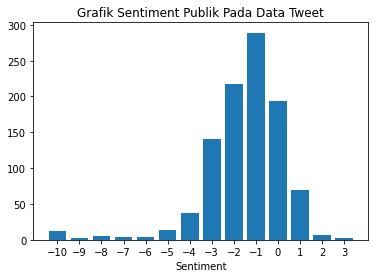

In [282]:
print ("Nilai rata-rata: "+str(np.mean(hasil_sentiment_tweet)))
print ("Standar deviasi: "+str(np.std(hasil_sentiment_tweet)))

labels, counts = np.unique(hasil_sentiment_tweet, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel('Sentiment')
plt.title('Grafik Sentiment Publik Pada Data Tweet')
plt.show()

Nilai rata-rata: -1.2525252525252526
Standar deviasi: 2.0017337654004166


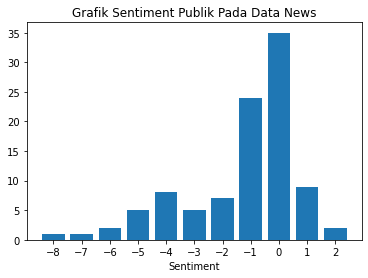

In [283]:
print ("Nilai rata-rata: "+str(np.mean(hasil_sentiment_news)))
print ("Standar deviasi: "+str(np.std(hasil_sentiment_news)))

labels, counts = np.unique(hasil_sentiment_news, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel('Sentiment')
plt.title('Grafik Sentiment Publik Pada Data News')
plt.show()

## SENTIMENT ANALYSIS WITH NAIVE BAYES

### Pada Analisis ini kita akan melakukan analisis sentimen menggunakan salah satu metode Supervised Learning yaitu Naive Bayes, dimana akan dibuat model pada data tweet dan mencoba mengklasifikai sentimen pada data baru contohnya pakai data news.

#### Data Frame dengan sentiment yang sudah di encoding dengan 0 (negatif) dan 1 (positif)

In [284]:
df_tweet.replace({"sentiment":{"negatif":0, "positif":1}}, inplace=True)
df_news.replace({"sentiment":{"negatif":0, "positif":1}}, inplace=True)
df_tweet

,tweet,clean,sentiment
0,Program ‘keberpihakan’ eeh maskudnyah ‘kesetar...,program eeh maskudnyah tara jgn kmu kjeblos ng...,1
1,"@barryallen_1st Hahahaha,,, cebong protes,,, s...",st hahahaha cebong protes tutup sumur resap su...,0
2,@aniesbaswedan @HumasSumedang @donyahmadmunir ...,nich kumpul buzzer kumpul gaji urusin sumur re...,1
3,@GunRomli @detikcom @aniesbaswedan Rumah lurah...,rumah lurah lebak bulus bohong tinggal situ iy...,0
4,Kontraktor bikin sumur resapan juga kan atas p...,kontraktor bikin sumur resap sumur resap perin...,0
...,...,...,...
995,Isyana Bagoes Oka ingin Anies meninjau langsun...,isyana bagus oka anies baswedan tinjau langsun...,1
996,Drainase vertikal atau sumur resapan hanya ber...,drainase vertikal sumur resap sumur resap fung...,0
997,Drainase vertikal atau sumur resapan hanya ber...,drainase vertikal sumur resap sumur resap fung...,0
998,Drainase vertikal atau sumur resapan hanya ber...,drainase vertikal sumur resap sumur resap fung...,0


In [285]:
vectorizer = TfidfVectorizer (max_features=1500)

model_g = GaussianNB()

v_data = vectorizer.fit_transform(df_tweet['clean']).toarray()

v = vectorizer.fit_transform(df_tweet['clean'])

print(v)


  (0, 339)	0.24717311608034281
  (0, 1166)	0.182482912610561
  (0, 1096)	0.1297123221005066
  (0, 1219)	0.1297123221005066
  (0, 1083)	0.2672169341431797
  (0, 891)	0.2831266075809232
  (0, 632)	0.5662532151618463
  (0, 639)	0.2831266075809232
  (0, 531)	0.24717311608034281
  (0, 1248)	0.2831266075809232
  (0, 769)	0.2831266075809232
  (0, 334)	0.2831266075809232
  (0, 1055)	0.13419888894697665
  (1, 497)	0.16607352163491163
  (1, 125)	0.15041907293754697
  (1, 60)	0.09154835128053299
  (1, 526)	0.29525433534762613
  (1, 113)	0.2668915526861062
  (1, 328)	0.2786631710745328
  (1, 239)	0.29525433534762613
  (1, 1326)	0.179322515144204
  (1, 1058)	0.5905086706952523
  (1, 240)	0.25030038841301283
  (1, 429)	0.29525433534762613
  (1, 1208)	0.2668915526861062
  :	:
  (998, 1190)	0.3972217805239769
  (998, 1090)	0.2121822628474718
  (998, 583)	0.20311804673117093
  (998, 659)	0.15152727244311878
  (998, 115)	0.14614206390807444
  (998, 1308)	0.05515239342190635
  (998, 369)	0.05515239342190

#### Membagi data set tweet menjadi data train dan data test

In [292]:
X_train, X_test, y_train, y_test = train_test_split(v_data, df_tweet['sentiment'], test_size=0.2, random_state=21)

In [293]:
model_g.fit(X_train,y_train)

y_preds = model_g.predict(X_test)

### Output Confussion Matrix, Classification Report, dan Accuracy Score
#### - Pada output di bawah, dapat dilihat bahwa jumlah support antara 0 dan 1 tidak seimbang, karna lebih banyak sentimen yang negatif dibanding positif. Namun accuracy pada model ini cukup baik yaitu sebesar 79 % akan memprediksi benar.  
#### - Model akan lebih baik dalam memprediksi jika data trainnya ditambah lagi, seperti menambah data dengan sentimen yang positif, agar mesin lebih pintar dalam mengenali data-data baru yang bersentimen positif.

In [296]:
print(confusion_matrix(y_test,y_preds))

print(classification_report(y_test,y_preds))

print('nilai akurasinya adalah ',accuracy_score(y_test, y_preds))

 

[[111  28]
 [ 14  47]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       139
           1       0.63      0.77      0.69        61

    accuracy                           0.79       200
   macro avg       0.76      0.78      0.77       200
weighted avg       0.81      0.79      0.80       200

nilai akurasinya adalah  0.79


## Memprediksi Sentiment pada Data Baru yaitu Data News

In [297]:
v_data = vectorizer.transform(df_news["clean"]).toarray()

y_classification = model_g.predict(v_data)


df_news["sentiment_predict"] = list(y_classification)

df_news

,date,title,clean,sentiment,sentiment_predict
0,"Sabtu, 11 Des 2021 07:49 WIB",PDIP DKI: Sumur Resapan Bukan Menanggulangi Ba...,pdip jakarta sumur resap sumur resap tanggulan...,0,0
1,"Sabtu, 11 Des 2021 06:02 WIB",Polemik Isyana di Sumur Resapan dan Tuduhan 'M...,polemik isyana sumur resap sumur resap tuduh m...,0,1
2,"Jumat, 10 Des 2021 18:03 WIB",Isyana Minta Anies Tinjau Sumur Resapan Tempat...,isyana anies baswedan tinjau sumur resap sumur...,1,1
3,"Jumat, 10 Des 2021 17:35 WIB","Lurah Sebut Warga Copot Plang Sumur Resapan, W...",lurah lebak bulus bohong warga copot plang sum...,0,0
4,"Jumat, 10 Des 2021 16:53 WIB",Pedagang: Jalan Tempat Mobil Isyana Terjeblos ...,dagang jalan mobil isyana jeblos sumur resap s...,1,1
...,...,...,...,...,...
94,"Rabu, 17 Nov 2021 14:40 WIB",Wagub DKI Nilai Sumur Resapan Efektif: Manfaat...,wagub jakarta nilai sumur resap sumur resap ef...,1,1
95,"Selasa, 16 Nov 2021 23:18 WIB","PDIP Minta Anggaran Sumur Resapan Dicoret, Wag...",pdip anggar sumur resap sumur resap sumur resa...,1,0
96,"Selasa, 16 Nov 2021 18:45 WIB",F-PDIP Usul Anggaran Sumur Resapan 2022 Dicore...,f pdip usul anggar sumur resap sumur resap sum...,1,1
97,"Selasa, 16 Nov 2021 16:22 WIB","Pembangunan Sumur Resapan Disorot, Wagub DKI B...",bangun sumur resap sumur resap sorot wagub jak...,0,0


### Pada output di bawah dapat dilihat bahwa supprt sudah cukup seimbang, dan nilai akurasi model dalam memprediksi sentiment cukup baik yaitu 68.8 %. 

In [298]:
print(confusion_matrix(df_news['sentiment'],df_news['sentiment_predict']))

print(classification_report(df_news['sentiment'],df_news['sentiment_predict']))

print('nilai akurasinya adalah ',accuracy_score(df_news['sentiment'],df_news['sentiment_predict']))

[[43 10]
 [21 25]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.74        53
           1       0.71      0.54      0.62        46

    accuracy                           0.69        99
   macro avg       0.69      0.68      0.68        99
weighted avg       0.69      0.69      0.68        99

nilai akurasinya adalah  0.6868686868686869


## VISUALISASI BI-GRAM WITH WORDCLOUD

### Pada Analisis ini kita akan melihat visualisasi bi-gram dengan wordcloud pada data tweet dan news yang sudah dianalisis sentimen sebelumnya

In [300]:
def bigram_freq_distribution(data):
    result = pd.Series(nltk.ngrams(data, 2)).value_counts()[:20]
    print(result)

In [301]:
df_tweet_positif = df_tweet[df_tweet['sentiment'] == 1]['clean'].copy()
df_tweet_negatif = df_tweet[df_tweet['sentiment'] == 0]['clean'].copy()
df_news_positif = df_news[df_news['sentiment'] == 1]['clean'].copy()
df_news_negatif = df_news[df_news['sentiment'] == 0]['clean'].copy()

In [302]:
tweet_positif = [word for tweet in df_tweet_positif for word in tweet.split()]
tweet_negatif = [word for tweet in df_tweet_negatif for word in tweet.split()]
news_positif = [word for news in df_news_positif for word in news.split()]
news_negatif = [word for news in df_news_negatif for word in news.split()]


## Bi-Gram Freq Distribution 

In [303]:
display(bigram_freq_distribution(tweet_positif))
display(bigram_freq_distribution(news_positif))

display(bigram_freq_distribution(tweet_negatif))
display(bigram_freq_distribution(news_negatif))

(sumur, resap)         619
(resap, sumur)         288
(anies, baswedan)      252
(anies, gagal)         210
(gagal, total)         210
(baswedan, anies)       91
(isyana, bagus)         74
(bagus, oka)            73
(baswedan, tinjau)      67
(gubernur, jakarta)     63
(jakarta, anies)        56
(dpp, psi)              54
(tinjau, sumur)         54
(jakarta, jakarta)      53
(psi, isyana)           53
(resap, mobil)          52
(ketua, dpp)            52
(mobil, jeblos)         52
(oka, gubernur)         47
(anggar, sumur)         34
dtype: int64


None

(sumur, resap)          92
(resap, sumur)          46
(anggar, sumur)          6
(anies, baswedan)        5
(pasar, minggu)          4
(bangun, sumur)          4
(soleh, solihun)         4
(dprd, jakarta)          3
(wagub, jakarta)         3
(proyek, sumur)          3
(resap, coret)           3
(jeblos, sumur)          3
(mobil, isyana)          3
(gali, sumur)            3
(mobil, jeblos)          3
(resap, mobil)           3
(drainase, vertikal)     3
(resap, aspal)           3
(resap, jebol)           2
(kontainer, sumur)       2
dtype: int64


None

(sumur, resap)         1603
(anies, gagal)          759
(gagal, total)          759
(resap, sumur)          750
(anies, baswedan)       526
(baswedan, anies)       225
(jakarta, jakarta)      129
(total, sumur)          122
(total, anies)          121
(jakarta, anies)        120
(proyek, sumur)         107
(gubernur, jakarta)      87
(anggar, sumur)          76
(resap, anies)           75
(lebak, bulus)           72
(lurah, lebak)           72
(bulus, bohong)          72
(pemprov, jakarta)       72
(resap, bangun)          71
(carut, marut)           59
dtype: int64


None

(sumur, resap)          90
(resap, sumur)          46
(bulus, bohong)         42
(lebak, bulus)          42
(lurah, lebak)          42
(bohong, lurah)         19
(resap, lurah)          15
(daya, alam)             4
(kontraktor, sumur)      4
(bikin, jalan)           4
(soleh, solihun)         4
(bohong, aspal)          4
(sumber, daya)           4
(resap, bikin)           3
(pemprov, jakarta)       3
(wagub, jakarta)         3
(anies, baswedan)        3
(drainase, vertikal)     3
(bohong, sumur)          3
(mobil, perosok)         3
dtype: int64


None

In [304]:
def wordcloud_visualization(data):
    wcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(data)
    plt.figure(figsize=(12,10))
    plt.imshow(wcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### WORDCLOUD VISUALIZATION
#### Pada visualisasi di bawah dapat dilihat distribusi bi-gram tweet dan news yang bersentimen positif dan negatif.
#### Pada tweet positif dan negatif lebih banyak membahas tentang sumur resapan yang gagal total, dan pada news positif membahas tentang mobil isyana, soleh solihun, dll. Sedangkan news negatif membahas tentang lurah lebak bulus yang berbobong.

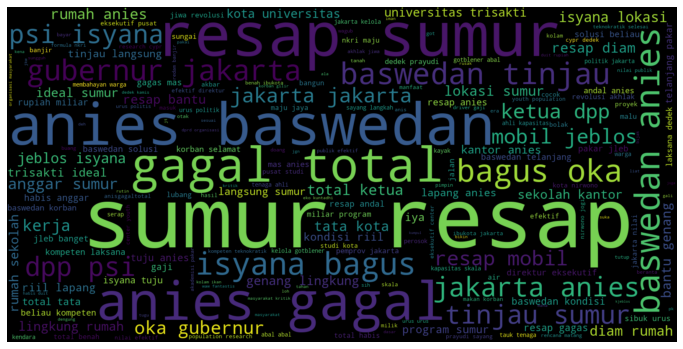

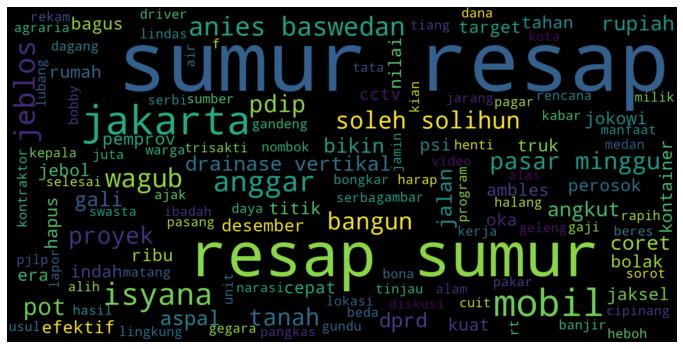

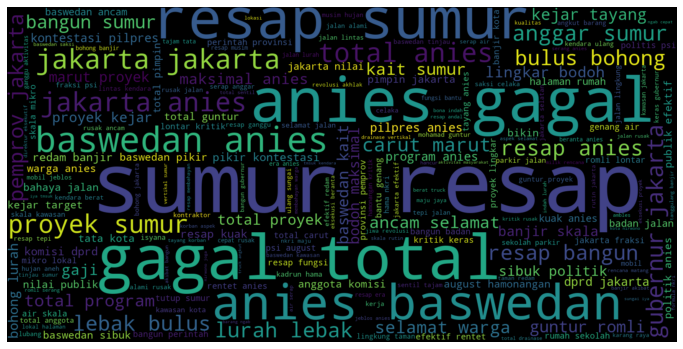

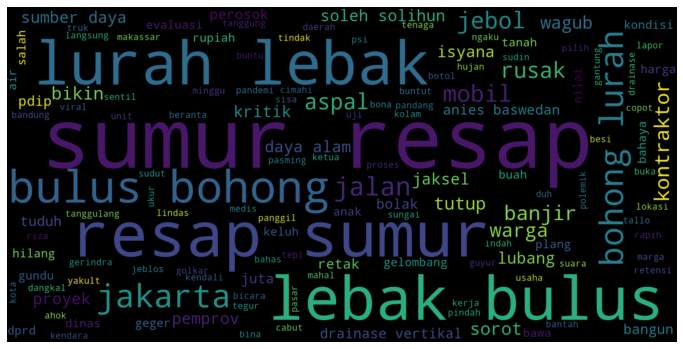

In [305]:
wordcloud_visualization(' '.join(tweet_positif))
wordcloud_visualization(' '.join(news_positif))

wordcloud_visualization(' '.join(tweet_negatif))
wordcloud_visualization(' '.join(news_negatif))

# NETWORK ANALYSIS

### Network Analysis atau Graph bisa digunakan untuk mendapatkan insight baru dari suatu data, dikarenakan mudahnya kita dalam melihat hubungan antar entitas. Karena hal ini juga maka visualisasi dalam graph sering digunakan dalam analisis sosial media.
### Analisis ini bisa melihat mana user yang memiliki banyak interaksi dengan user lainnya dengan cepat, mana user yang merupakan pusat dari sebuah topik, dan kita juga bisa melakukan analisis user yang dicurigai merupakan bot.

In [307]:
tweet_gram = [word for tweet in df_tweet["clean"] for word in tweet.split()]
fdist = nltk.FreqDist(nltk.ngrams(tweet_gram, 2))
list_data = [[k,v] for k,v in fdist.items()]
df_bigram = pd.DataFrame(list_data, columns=['bigram', 'count'])
df_bigram_sort = df_bigram.sort_values(by=["count"], ascending=False).copy().reset_index(drop=True)[:1642]
df_bigram_sort

,bigram,count
0,"(sumur, resap)",2222
1,"(resap, sumur)",1035
2,"(gagal, total)",969
3,"(anies, gagal)",969
4,"(anies, baswedan)",778
...,...,...
1637,"(isyana, driver)",1
1638,"(gaji, beli)",1
1639,"(makan, lokasi)",1
1640,"(ambles, sial)",1


In [308]:
d = df_bigram_sort.set_index("bigram").T.to_dict("records")

G = nx.Graph()
nodes_size = []

for node, weight in d[0].items():
    G.add_edge(node[0], node[1], weight = weight*10)

deg_val = dict(G.degree)

### Pada graph di bawah dapat dilihat bahwa data berpusat pada satu pusat di tengah, Namun sulit untuk diinterpretasi karena terlalu banyak node nya. Maka dari itu akan diperkecil dengan hanya melihat degree/hubungan antar node yang lebih dari 10 

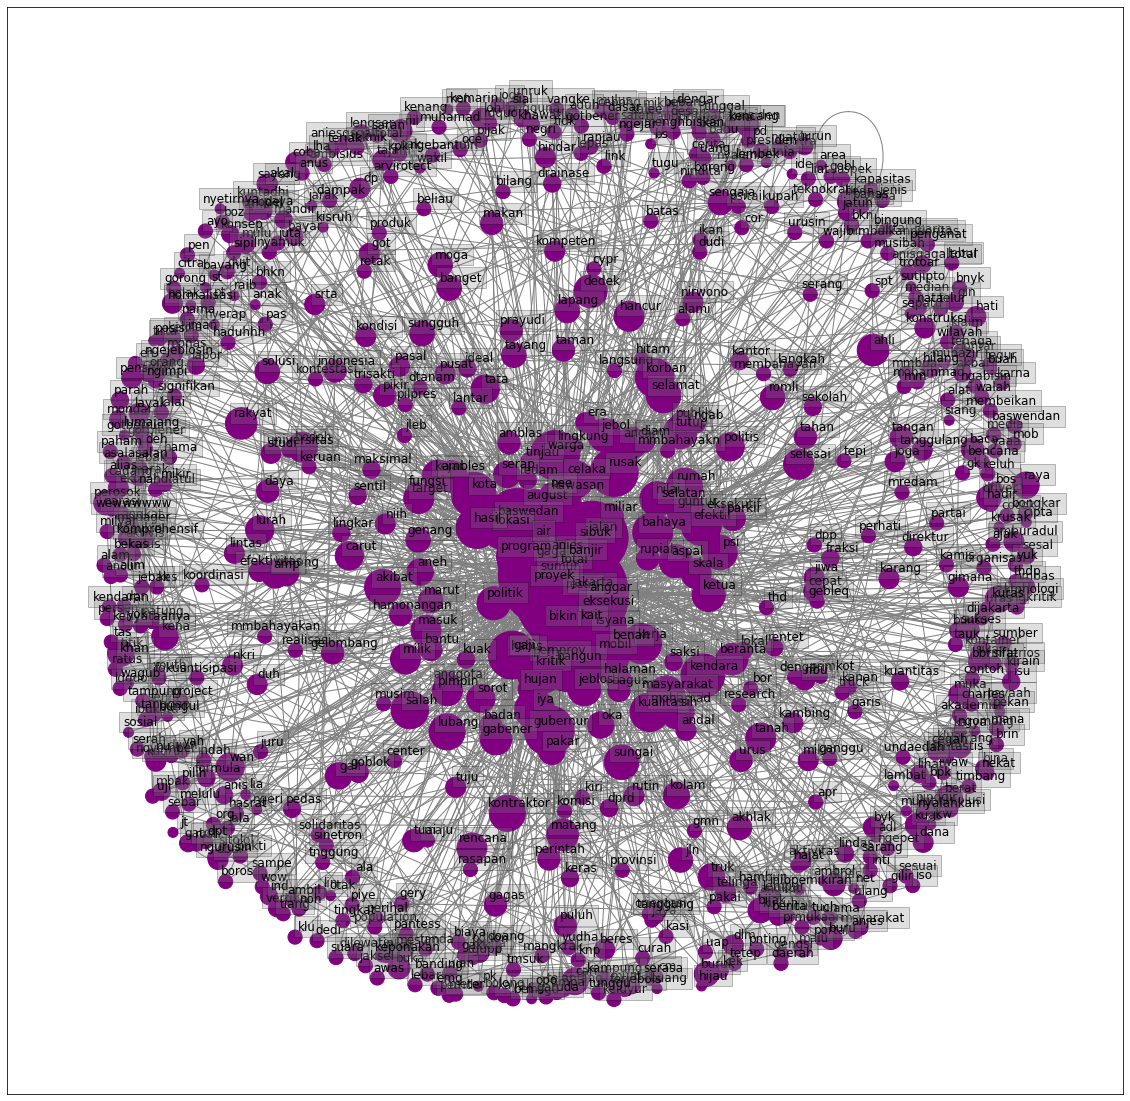

In [309]:
fig, ax = plt.subplots(
    figsize=(20, 20)
)

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(
    G, 
    pos = pos,
    font_size=12,
    width=1,
    edge_color='grey',
    node_color='purple',
    with_labels = False,
    node_size = [weight * 100 for weight in deg_val.values()],
    ax = ax
)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.025, value[1]+.015
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=12)
    
# plt.show()

In [310]:
deg_filter = G.degree()
items_filter = [n for n in deg_filter if n[1] > 10]

node = [node[0] for node in items_filter]
degree = [node[1]*20 for node in items_filter]

### Pada graph di bawah dapat dilihat bahwa sudah lebih mudah untuk di analisa, Namun ternyata masih kata yang berupa stopword yaitu kata 'iya' dan 'sih'.
### Pada graph di bawah, kata anies, sumur, resap, total, proyek, jakarta, tutup, warga, jebol, akibat berada di tengah atau pusat. Hal ini karena kata-kata tersebut memiliki hubungan yang lebih banyak dengan kata-kata disekitarnya. 

Graph with 52 nodes and 266 edges


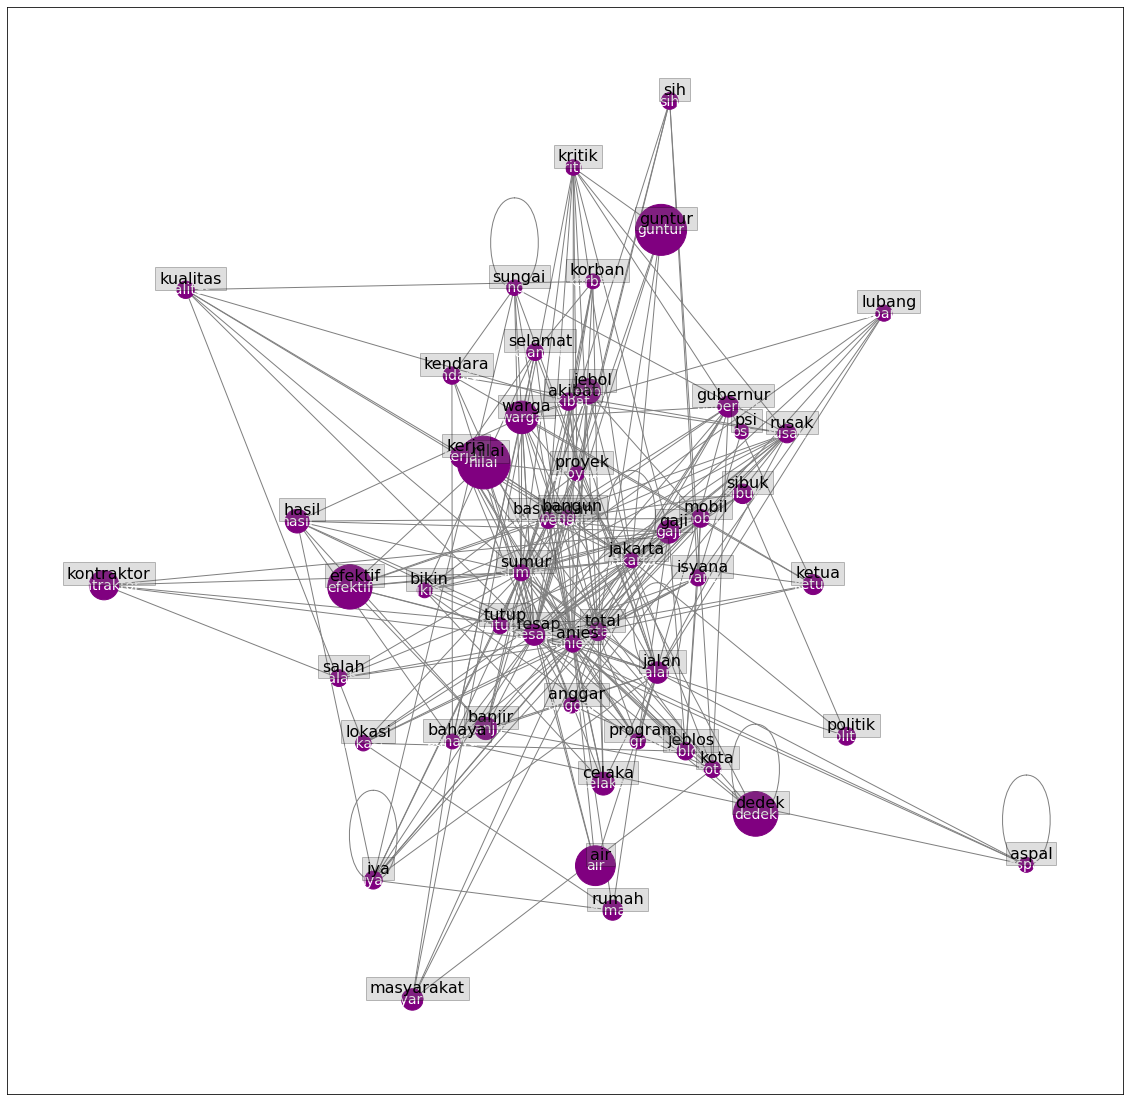

In [311]:
fig, ax = plt.subplots(
    figsize=(20, 20)
)

pos = nx.spring_layout(G, k=1.5)
k = G.subgraph(node)
print(k)

nx.draw_networkx(
    k, 
    pos=pos,
    font_size=14,
    font_color='white',
    width=1,
    edge_color='grey',
    node_color='purple',
    node_size = degree,
    with_labels= True,
    ax=ax
    )

for key, value in pos.items():
  if key in node:
    x, y = value[0]+.005, value[1]+.005
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=16)

plt.show()


# KESIMPULAN

### Pada beberapa analisis yang sudah dilakukan di atas, dapat disimmpulkan bahwa data twitter dan judul berita sentimen publik terhadap program sumur resapan yang dilaksanakan oleh Pemprov DKI JAKARTA masih negatif. Didukung karena terdapatnya kejadian yang seperti sumur yang ambles, mobil artis yang terperosok karna sumur resapan, mobil anggota salah satu partai yang juga terperosok, banjir yang masih terjadi, serta lurah lebak bulus yang berbohong mengenai sumur resapan ini.
### Analisis ini hanya mampu meprepresentasikan publik yang menggunakan aplkasi twitter dan edaran salah satu portal berita. Data ini tidak mencakup pada publik yang tidak memakai aplikasi twitter dan portal-portal berita yang lain.  
### Pada analisis ini setidaknya dapat melihat sebagian kecil opini publik tentang program sumur resapan, walaupun fakta dilapangan bahwa target sumur resapan yang dibangun oleh pemprov adalah 40.000 sumur. Dan tentunya pasti ada yang gagal, tidak mungkin berhasil semua. 

# SARAN

### Analisis ini dapat dikembangkan lebih lanjut kedepannya seperti dengan menambah data set yang akan digunakan, menambah tweet, atau menambah judul berita dari berbagai portal berita. Lalu menambah kategori sentimen netral, dan mungkin membuat machine learning yang lebih canggih seperti mampu menganalisa data text sindiran, membaca perasaan maksud pembuat tweet, dll dibandingkan dengan machine learning sederhana yang digunakan pada analisis ini.  

# TERIMA KASIH
# WASSALAMUALAIKUM WR. WB.